<a href="https://colab.research.google.com/github/Japar-sodik/ALPRO/blob/String/Japar_Sodik_2111723_AI_P13_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribusi Data

Distribusi data adalah pola atau bentuk penyebaran data dalam suatu dataset yang menunjukkan bagaimana nilai-nilai data tersebar di seluruh rentang nilai.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

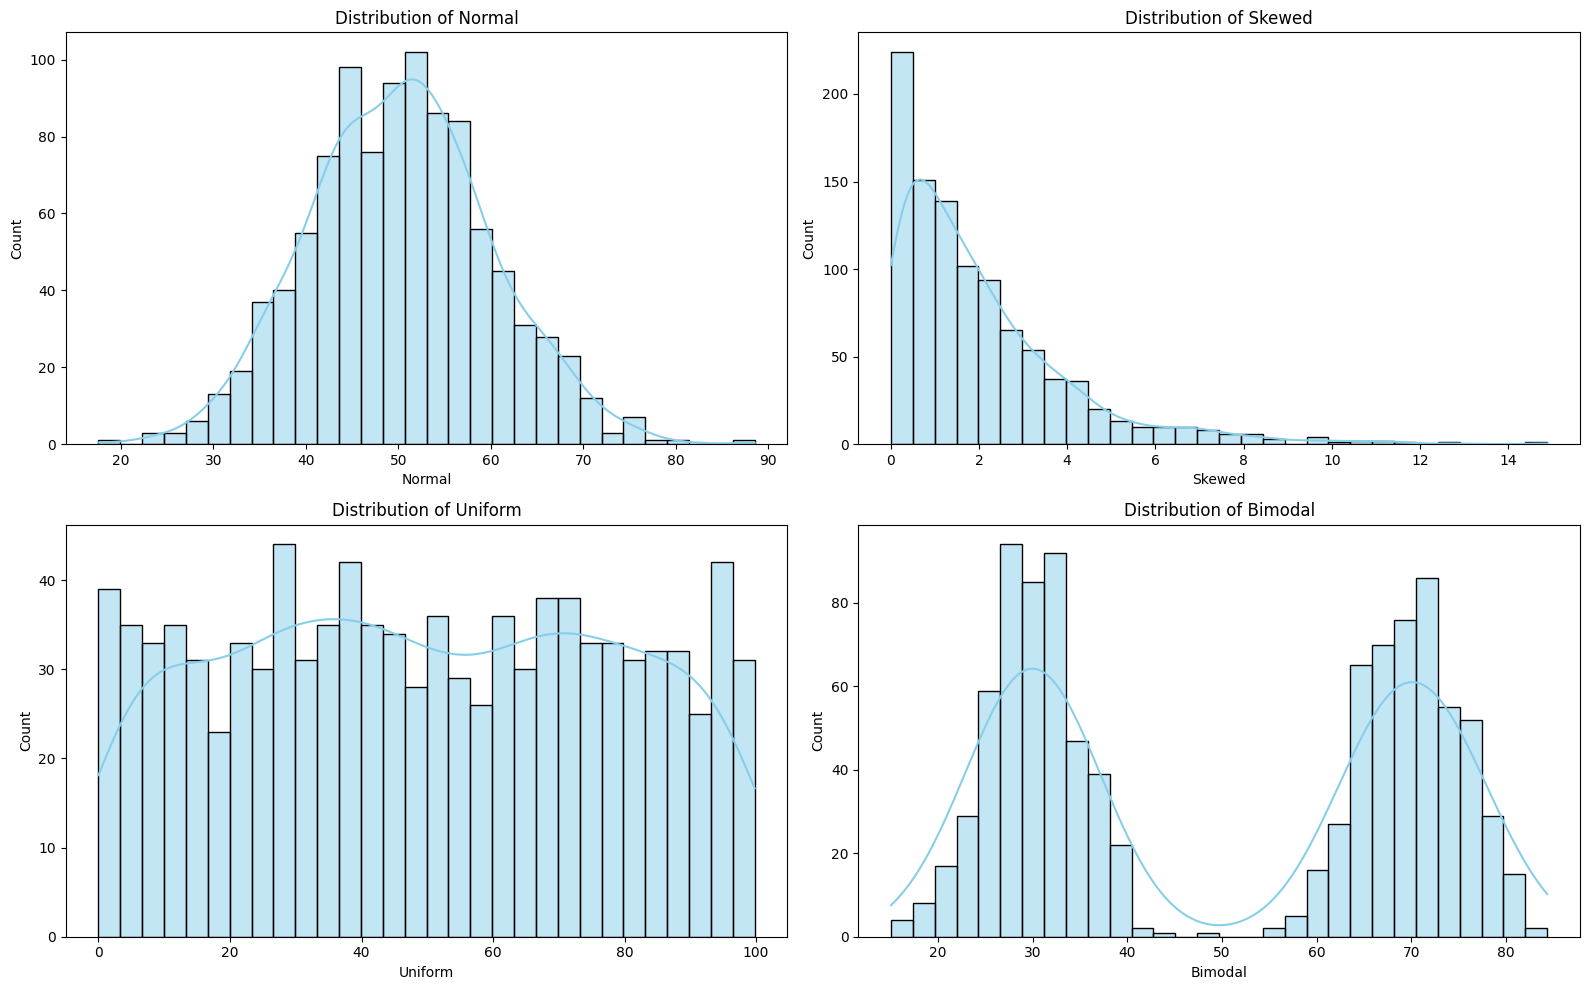

In [ ]:
#Inisialisasi nilai random
np.random.seed(42)
data = {
    'Normal': np.random.normal(loc=50, scale=10, size=1000), #Normal Distribution
    'Skewed': np.random.exponential(scale=2, size=1000), #Skewed Distribution
    'Uniform': np.random.uniform(low=0, high=100, size=1000), #Uniform Distribution
    'Bimodal': np.concatenate([
        np.random.normal(loc=30, scale=5, size=500),
        np.random.normal(loc=70, scale=5, size=500)
    ]), #Bimodal Distribution
}
#Convert ke dataframe
df = pd.DataFrame(data)

#Visualisasikan
plt.figure(figsize=(16, 10))
for i, kolom in enumerate(df.columns,1):
    plt.subplot(2, 2, i)
    sns.histplot(df[kolom], kde=True, bins = 30, color= 'skyblue')
    plt.title(f'Distribution of {kolom}')
plt.tight_layout()
plt.show()

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jaceprater/smokers-health-data")

print("Path to dataset files:", path)

100%|██████████| 29.4k/29.4k [00:00<00:00, 25.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/jaceprater/smokers-health-data/versions/1


In [ ]:
import os
data_path = "/root/.cache/kagglehub/datasets/jaceprater/smokers-health-data/versions/1"
files = os.listdir(data_path)
print('Filenya adalah ', files)

Filenya adalah  ['smoking_health_data_final.csv']


In [ ]:
import pandas as pd
data_file = os.path.join(data_path, 'smoking_health_data_final.csv')
data = pd.read_csv(data_file)
data

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0
...,...,...,...,...,...,...,...
3895,37,male,yes,88,122.5/82.5,60.0,254.0
3896,49,male,yes,70,123/75,60.0,213.0
3897,56,male,yes,70,125/79,60.0,246.0
3898,50,male,yes,85,134/95,60.0,340.0


Note: Distribusi hanya bisa dipakai untuk data numerik, bukan kategori!!

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5   cigs_per_day    3886 non-null   float64
 6   chol            3893 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 213.4+ KB


In [ ]:
data.columns

Index(['age', 'sex', 'current_smoker', 'heart_rate', 'blood_pressure',
       'cigs_per_day', 'chol'],
      dtype='object')

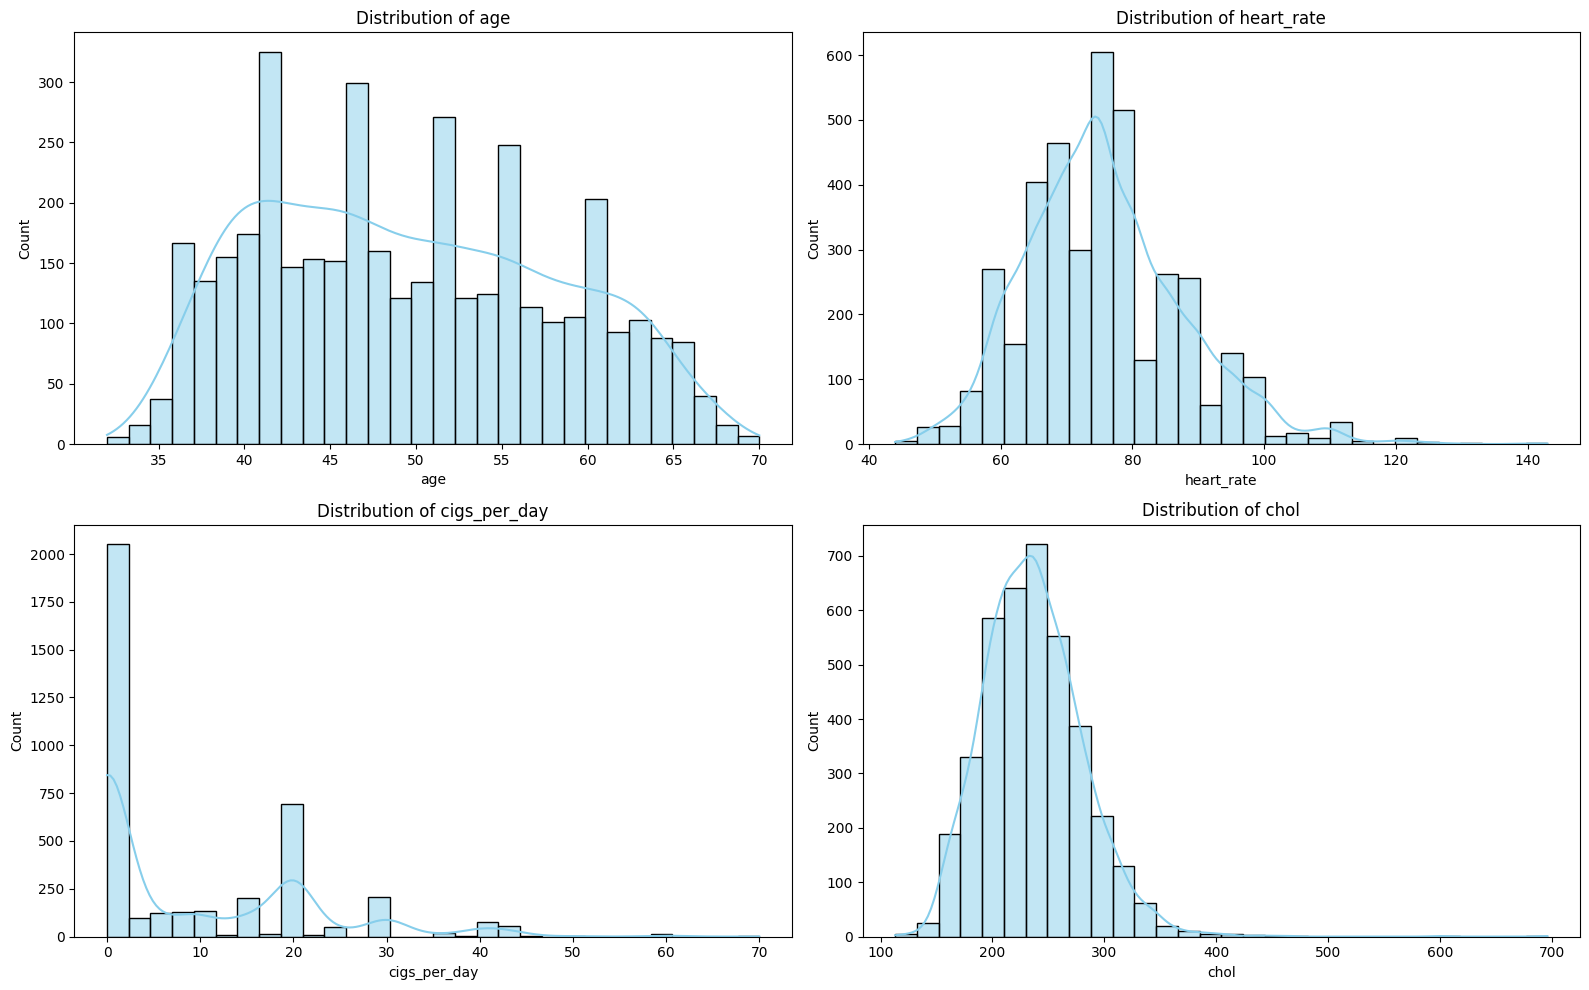

In [ ]:
kolom_numerik = ['age', 'heart_rate', 'cigs_per_day', 'chol']

#Visualisasikan
plt.figure(figsize=(16, 10))
for i, kolom in enumerate(kolom_numerik,1):
    plt.subplot(2, 2, i)
    sns.histplot(data[kolom], kde=True, bins = 30, color= 'skyblue')
    plt.title(f'Distribution of {kolom}')
plt.tight_layout()
plt.show()

Data Distribusi tidak normal, belum tentu tidak sehat, semua tergantung konteks dan keperluan analisis selanjutnya.

untuk mengetahui secara langsung apakah distribusi data normal atau tidak, dapat dilakukan Uji Normalitas

**Shapiro-Wilk Test** <br>
Menguji apakah distribusi data sama dengan distribusi normal.

In [ ]:
from scipy.stats import shapiro
for kolom in kolom_numerik:
  stat, p = shapiro(data[kolom])
  print(f'{kolom}: Statistic = {stat:.3f}, P = {p:.3f}')
  if p > 0.05:
    print('Data berdistribusi Normal\n')
  else:
    print('Data tidak berdistribusi Normal\n')

age: Statistic = 0.967, P = 0.000
Data tidak berdistribusi Normal

heart_rate: Statistic = 0.974, P = 0.000
Data tidak berdistribusi Normal

cigs_per_day: Statistic = nan, P = nan
Data tidak berdistribusi Normal

chol: Statistic = nan, P = nan
Data tidak berdistribusi Normal

